In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import torch

In [ ]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import json

In [ ]:
pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')
# embeddings = model.encode(sentences)

In [ ]:
!unzip -qo '/content/drive/MyDrive/MMML-A2/sherlock_val_with_split_idxs_v1_1.json.zip' -d '/content/data'


In [ ]:
!unzip -qo '/content/drive/MyDrive/MMML-A2/sherlock_train_v1_1.json.zip' -d '/content/data'

In [ ]:
with open('/content/data/sherlock_val_with_split_idxs_v1_1.json', 'r') as f:
  data = json.load(f)

df = pd.json_normalize(data)
df.tail(10)

instance_id  split_idx  \
22727  b9360e9c431fc540bc0045559236d582         22   
22728  8963586130e1c0de82a53d0f259720bf         22   
22729  f468e0c9c55e291d0d1fadcdcba4092d         22   
22730  08be07c77db0d9ac7897a7852037277e         22   
22731  2c20fbfbb3526b79ab17bc84d7cf3075         22   
22732  c32336cc5dfa405fa2093f41ef472ea3         22   
22733  d8674bb755f23ba5f38c658991ab46f9         22   
22734  02909db0ef4bbf1f058e7591a8f1ad0b         22   
22735  fd49a5fe623335ba581fdb88c5c90868         22   
22736  9faac61c988006c6d2b56c047507a935         22   

                                        inputs.image.url  inputs.image.width  \
22727  https://cs.stanford.edu/people/rak248/VG_100K/...                 500   
22728  https://cs.stanford.edu/people/rak248/VG_100K_...                 500   
22729  https://cs.stanford.edu/people/rak248/VG_100K/...                 500   
22730  http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...                1920   
22731  http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...                1920   
22732  https://cs.stanford.edu/people/rak248/VG_100K/...                 400   
22733  https://cs.stanford.edu/people/rak248/VG_100K/...                 500   
22734  https://cs.stanford.edu/people/rak248/VG_100K_...                 500   
22735  https://cs.stanford.edu/people/rak248/VG_100K/...                 500   
22736  http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...                1920   

       inputs.image.height                                      inputs.bboxes  \
22727                  386  [{'height': 38, 'width': 74, 'left': 334, 'top...   
22728                  333  [{'height': 330, 'width': 376, 'left': 124, 't...   
22729                  332  [{'height': 109, 'width': 186, 'left': 5, 'top...   
22730                  808  [{'height': 609, 'width': 276, 'left': 10, 'to...   
22731                 1080  [{'height': 344, 'width': 689, 'left': 430, 't...   
22732                  302  [{'height': 140, 'width': 137, 'left': 257, 't...   
22733                  357  [{'height': 163, 'width': 158, 'left': 196, 't...   
22734                  400  [{'height': 303, 'width': 467, 'left': 9, 'top...   
22735                  375  [{'height': 185, 'width': 158, 'left': 116, 't...   
22736                 1080  [{'height': 344, 'width': 411, 'left': 353, 't...   

                                       inputs.clue  inputs.confidence  \
22727   the words US Navy on the side of the plane                3.0   
22728  a toilet bowl with a white reflection in it                2.0   
22729             two swivel chairs by the window.                1.0   
22730     flowers around where the men are sitting                1.0   
22731        a firetruck parked in a gravelly area                2.0   
22732                   a plate of food on a towel                1.0   
22733                     a cat on top of a laptop                2.0   
22734                       there is a white plate                2.0   
22735                            a cat in the sink                2.0   
22736               a cat on top of the man's body                2.0   

       inputs.obs_idx                       targets.inference  
22727               0       The plane belongs to the military  
22728               0             there is alight on above it  
22729               2       there is a desk in the apartment.  
22730               1                it is in someones garden  
22731               2                  there is a fire nearby  
22732               0                        the plate is hot  
22733               1    the cat had just fallen asleep there  
22734               1            the food is presented better  
22735               0  The cat had just hopped into the sink.  
22736               1            The cat just got on the man.

In [ ]:
with open('/content/data/sherlock_train_v1_1.json', 'r') as f:
  data = json.load(f)

df_tr = pd.json_normalize(data)
df_tr

instance_id  \
0       2f34bb38723c3ad5d5142091be91a846   
1       fd7488c0f8b8cbe06d7f7b55e619ee7d   
2       923718a69d04be450e272221f7deb3c4   
3       a0427cc596600fa9c308d84bbeb0d8b2   
4       c800e18c7f8d1c788cb29ee93bd64847   
...                                  ...   
317049  10cf00a685cd91aad3920222d02bec27   
317050  e2b6a92144dd115b18b6d5d5f7d7a3ec   
317051  95f690be9152a8fb9103cc5203ae14df   
317052  7b57b274cd215372817266965ae0aa23   
317053  adda96bebae049ddbe9cd597ffb604c6   

                                         inputs.image.url  inputs.image.width  \
0       http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...                1920   
1       http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...                1920   
2       http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...                1920   
3       https://cs.stanford.edu/people/rak248/VG_100K/...                 500   
4       https://cs.stanford.edu/people/rak248/VG_100K/...                 500   
...                                                   ...                 ...   
317049  http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...                1920   
317050  http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...                1920   
317051  https://cs.stanford.edu/people/rak248/VG_100K_...                 500   
317052  https://cs.stanford.edu/people/rak248/VG_100K_...                 500   
317053  https://cs.stanford.edu/people/rak248/VG_100K_...                 500   

        inputs.image.height  \
0                       816   
1                       816   
2                       816   
3                       333   
4                       333   
...                     ...   
317049                  800   
317050                  800   
317051                  375   
317052                  375   
317053                  375   

                                            inputs.bboxes  \
0       [{'height': 486, 'width': 1907, 'left': 13, 't...   
1       [{'height': 284, 'width': 213, 'left': 622, 't...   
2       [{'height': 390, 'width': 601, 'left': 436, 't...   
3       [{'height': 32, 'width': 141, 'left': 359, 'to...   
4       [{'height': 213, 'width': 422, 'left': 59, 'to...   
...                                                   ...   
317049  [{'height': 44, 'width': 61, 'left': 937, 'top...   
317050  [{'height': 739, 'width': 1436, 'left': 300, '...   
317051  [{'height': 118, 'width': 126, 'left': 153, 't...   
317052  [{'height': 197, 'width': 498, 'left': 0, 'top...   
317053  [{'height': 244, 'width': 209, 'left': 291, 't...   

                                           inputs.clue  inputs.confidence  \
0                  snow on the ground and in the trees                3.0   
1                                warm coats being worn                3.0   
2                    horses wearing saddles and reigns                3.0   
3               words written on bottom right of photo                3.0   
4                                   propeller airplane                2.0   
...                                                ...                ...   
317049  There's a BMW logo on the back of the blue car                3.0   
317050                  Tall buildings line the street                3.0   
317051                   the cat sitting on the ground                1.0   
317052                    the plants in the background                1.0   
317053                the bench attached to the ground                1.0   

        inputs.obs_idx                                  targets.inference  
0                    0                                It recently snowed.  
1                    1                                It is cold outside.  
2                    2        these horses are used for horseback riding.  
3                    0            this is the company that took the photo  
4                    1     this airplane was manufactured a long time ago  
...                ...                  

In [ ]:
inferences = df['targets.inference']
clues = df['inputs.clue']
confidence = df['inputs.confidence']

embeddings_inf = model.encode(inferences)
embeddings_clues = model.encode(clues)






In [ ]:
inferences

0                                   people going to eat it
1                   they are looking for a missing person.
2        The person who decorated this room likes old c...
3                                      this is a classroom
4        baseball games are sometimes played in the eve...
                               ...                        
22732                                     the plate is hot
22733                 the cat had just fallen asleep there
22734                         the food is presented better
22735               The cat had just hopped into the sink.
22736                         The cat just got on the man.
Name: targets.inference, Length: 22737, dtype: object

In [ ]:
def make_heatmap(x1, x2, similarity=util.pytorch_cos_sim, n=500):
  sim = similarity(x1[:n, ], x2[:n, :])
  sns.heatmap(sim, cmap='magma')
  plt.show()
  return

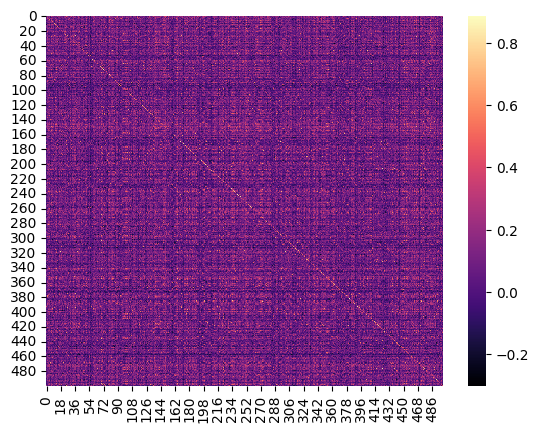

In [ ]:
make_heatmap(embeddings_inf, embeddings_clues)

In [ ]:
df1 = df[df['inputs.confidence'] == 1]
inferences_c1 = df1['targets.inference']
clues_c1 = df1['inputs.clue']


In [ ]:
embeddings_inf_c1 = model.encode(inferences_c1.to_list())
embeddings_clues_c1 = model.encode(clues_c1.to_list())

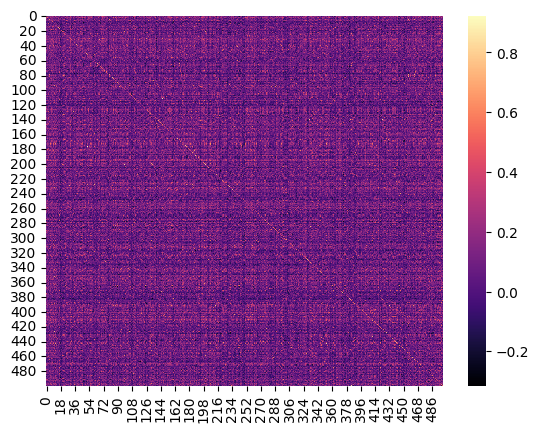

In [ ]:
make_heatmap(embeddings_inf_c1, embeddings_clues_c1)

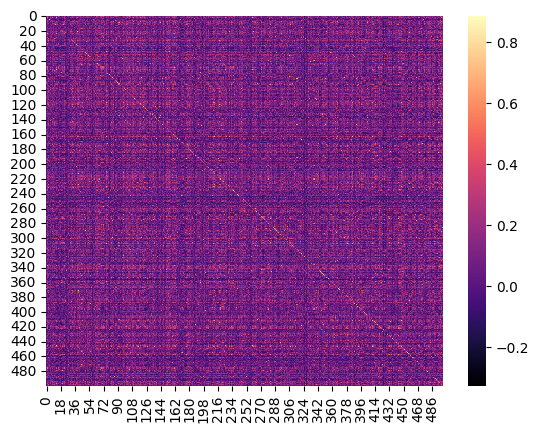

In [ ]:
df2 = df[df['inputs.confidence'] == 2]
inferences_c2 = df2['targets.inference']
clues_c2 = df2['inputs.clue']

embeddings_inf_c2 = model.encode(inferences_c2.to_list())
embeddings_clues_c2 = model.encode(clues_c2.to_list())

make_heatmap(embeddings_inf_c2, embeddings_clues_c2)


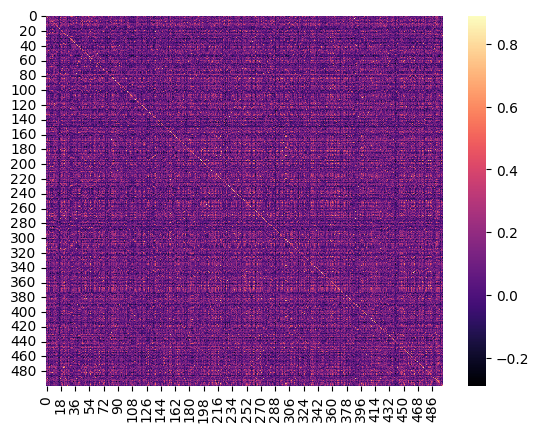

In [ ]:
df3 = df[df['inputs.confidence'] == 3]
inferences_c3 = df3['targets.inference']
clues_c3 = df3['inputs.clue']

embeddings_inf_c3 = model.encode(inferences_c3.to_list())
embeddings_clues_c3 = model.encode(clues_c3.to_list())

make_heatmap(embeddings_inf_c3, embeddings_clues_c3)

In [ ]:
print(cosine_sim.shape)

torch.Size([22737, 22737])


In [ ]:
torch.diagonal(cosine_sim).shape

torch.Size([22737])

In [ ]:
df['cosine'] = torch.diagonal(cosine_sim)

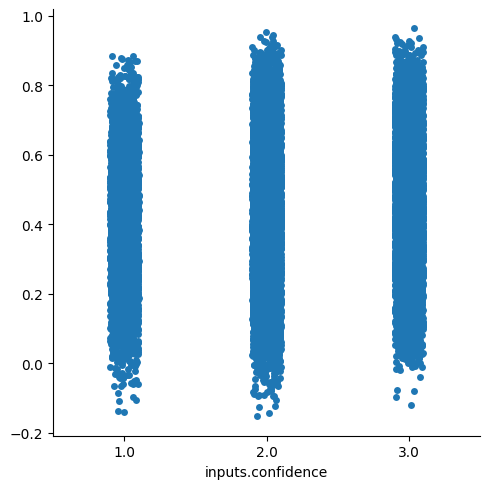

In [ ]:
sns.catplot(x=confidence, y=torch.diagonal(cosine_sim))

<Axes: >

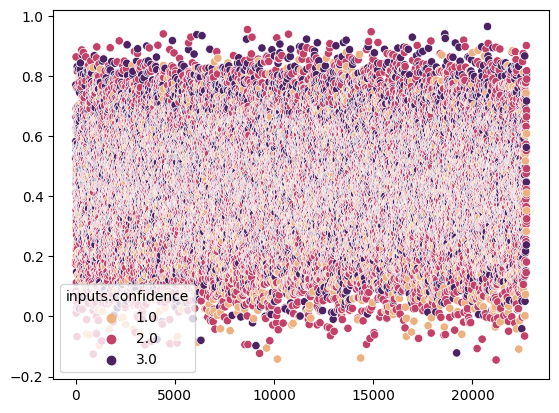

In [ ]:
sns.scatterplot(x=range(cosine_sim.shape[0]),y=torch.diagonal(cosine_sim), hue=confidence, palette='flare')

In [ ]:
from sklearn.manifold import TSNE
clues = TSNE(n_components=2, learning_rate='auto',
           init='random').fit_transform(embeddings_clues)

<Axes: >

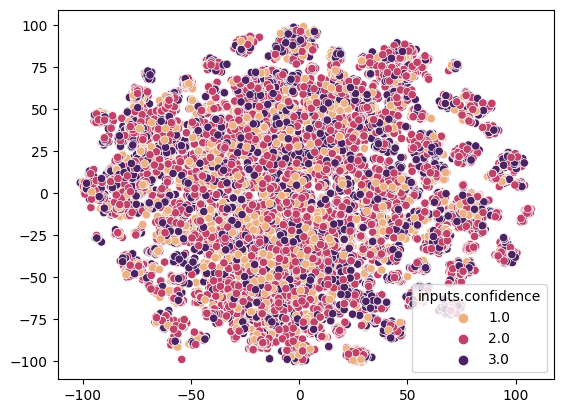

In [ ]:
sns.scatterplot(x=clues[:,0], y=clues[:, 1], hue=confidence, palette='flare')

In [ ]:
inf_plot = TSNE(n_components=2, learning_rate='auto',
           init='random').fit_transform(embeddings_inf)

<Axes: >

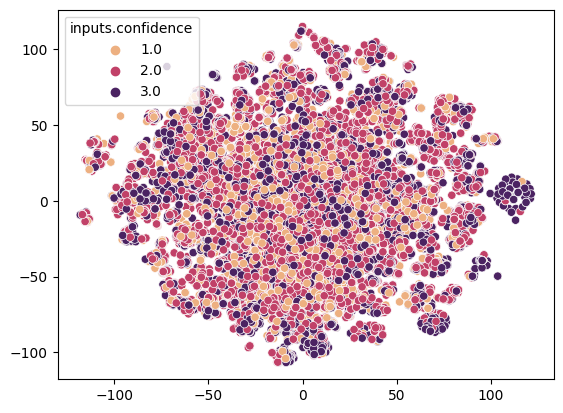

In [ ]:
sns.scatterplot(x=inf_plot[:,0], y=inf_plot[:,1], hue=confidence, palette='flare')

Human Analysis

In [ ]:
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import pil_to_tensor

from PIL import Image
import requests
from io import BytesIO

In [ ]:
df.iloc[1005]

instance_id                             749a679ba65782d3c249a5e6d0331c0f
split_idx                                                              1
inputs.image.url       http://s3-us-west-2.amazonaws.com/ai2-rowanz/v...
inputs.image.width                                                  1920
inputs.image.height                                                 1080
inputs.bboxes          [{'height': 261, 'width': 163, 'left': 1058, '...
inputs.clue                                 Red Stripe beer on the table
inputs.confidence                                                    1.0
inputs.obs_idx                                                         0
targets.inference                  this scene is taking place in Jamaica
Name: 1005, dtype: object

In [ ]:
def get_example(row):
  url = row['inputs.image.url']
  response = requests.get(url)
  img = pil_to_tensor(Image.open(BytesIO(response.content)))

  # bounding box in (xmin, ymin, xmax, ymax) format

  bbox = [[box['left'], box['top'], box['left']+box['width'], box['top'] + box['height']] for box in row['inputs.bboxes']]
  bbox = torch.tensor(bbox, dtype=torch.int)

  # draw bounding boxes on the input image
  img=draw_bounding_boxes(img, bbox, width=3,
  colors=[(255,0,0),(0,255,0)])
  img = torchvision.transforms.ToPILImage()(img)
  return img

url: 
http://s3-us-west-2.amazonaws.com/ai2-rowanz/vcr1images/movieclips_Grandmas_Boy/HgmE4x7yg3c@0.jpg


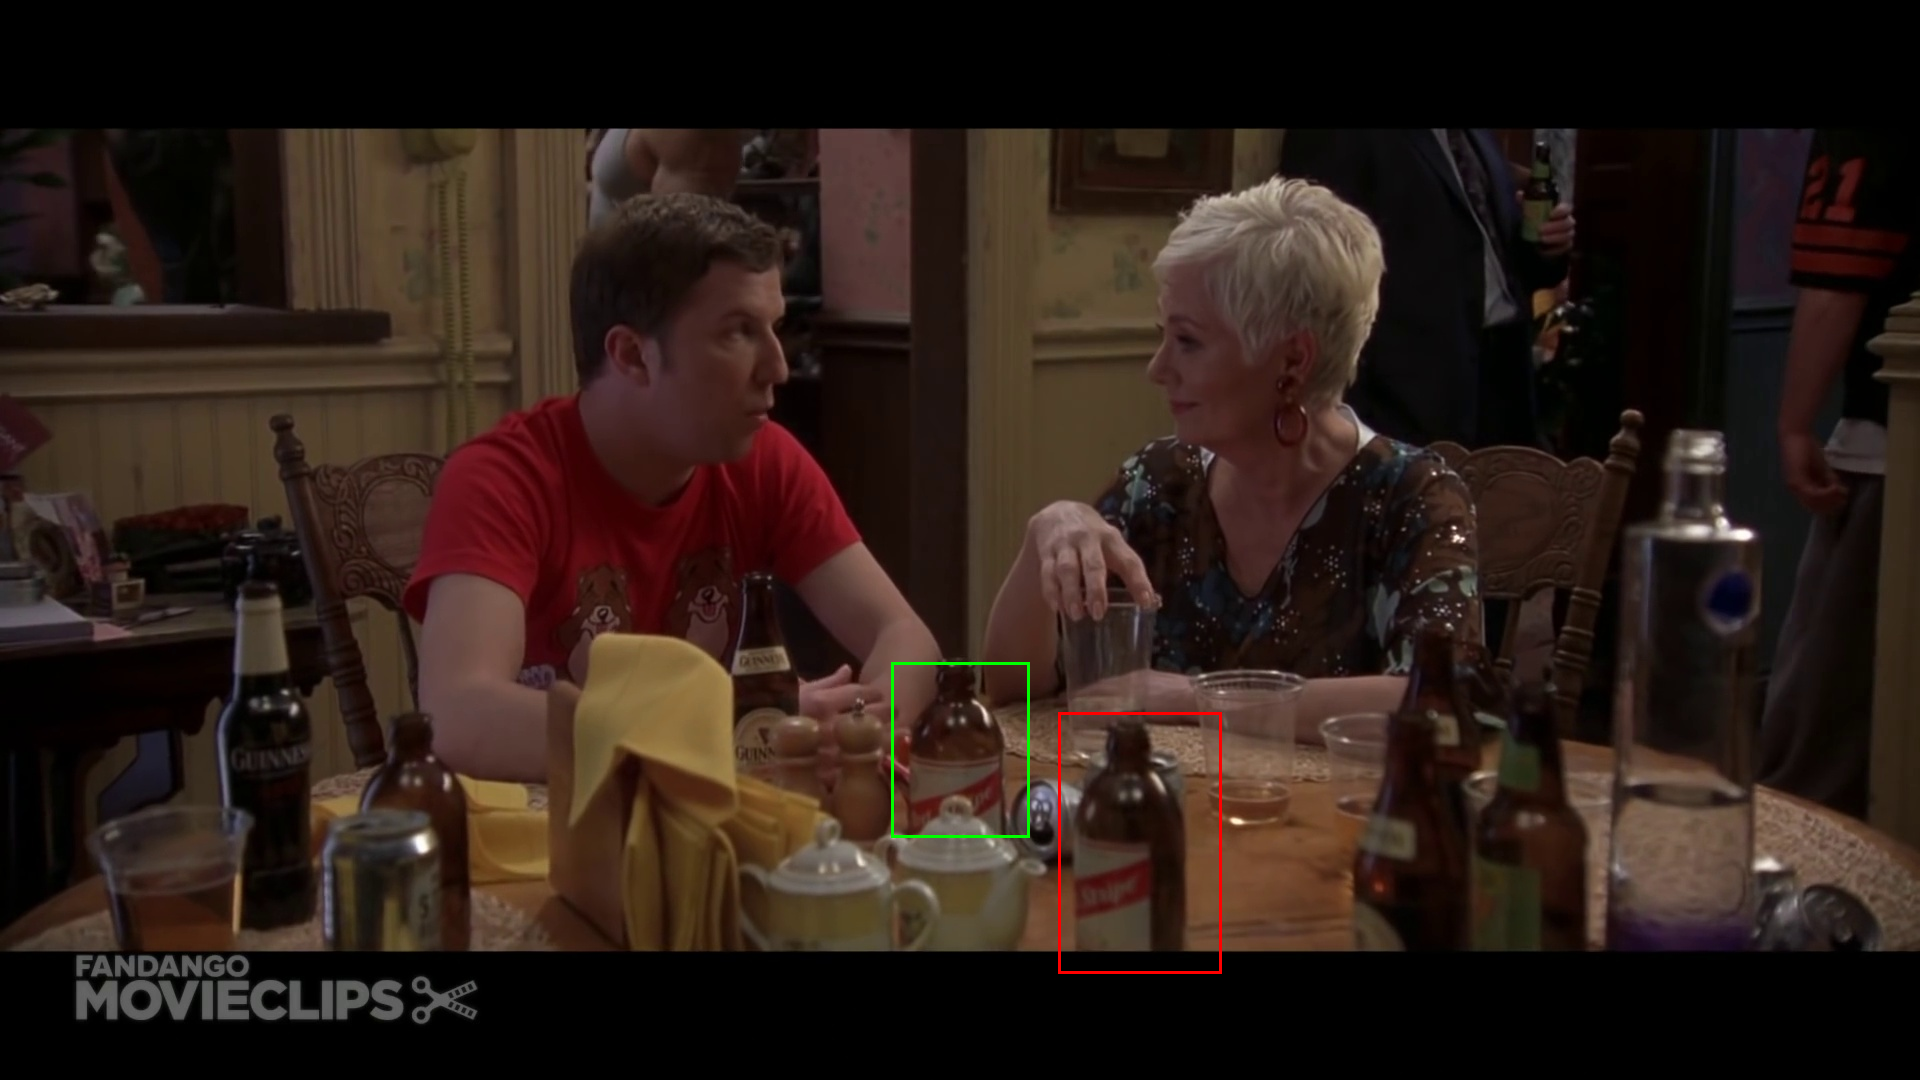

In [ ]:
get_example(df.iloc[1005])



id: 33bee6774dab3f824a0ee3feea7f1ad3 	clue: poster of company names lining the background wall


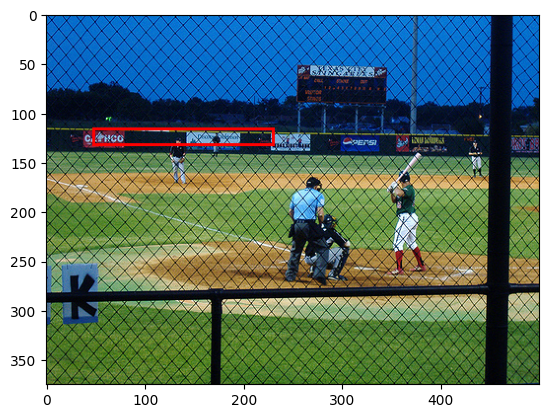

gt: the names listed are game sponsors


id: e528b53293c4a5ff9210723914c8056e 	clue: a teddy bear with a tag on its ear


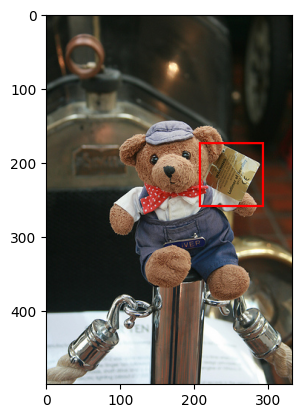

gt: the bear is for sale


id: e8c3f17b4beefbe79ea8214f81dab568 	clue: extremely lush and bright green foliage


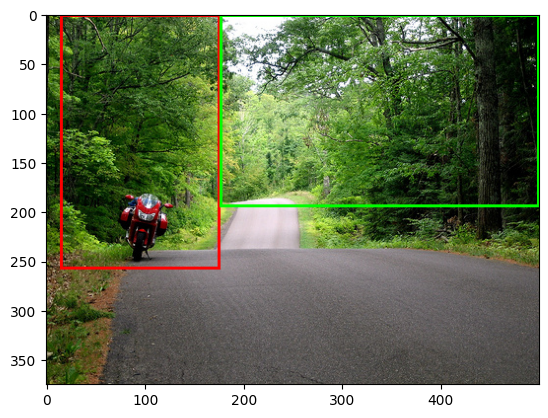

gt: it is summer time


id: 96129922f95a13bb6b6a230a9cefe61d 	clue: a man bending down on top of a deck


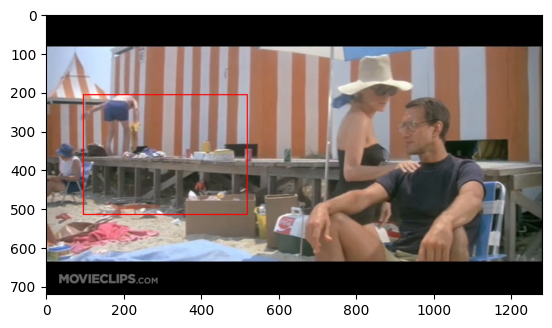

gt: the man is doing construction work on the deck


id: fb27f556b0df01ebad4a60ce41a4f5d6 	clue: The woods are dense and full of very tall trees.


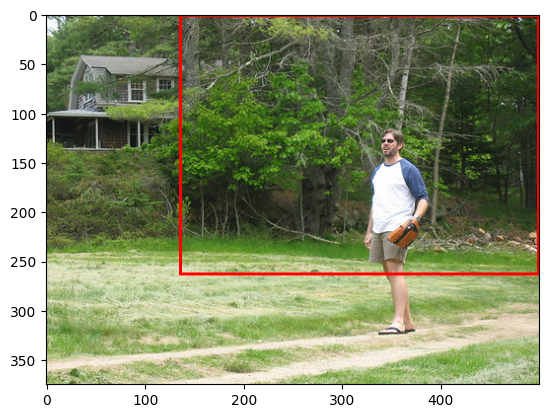

gt: This is an old, mature forest.


id: d85701d20fb432f482793fa8be7282de 	clue: a couple of goats with short coats grazing on the grass in a field of grass.


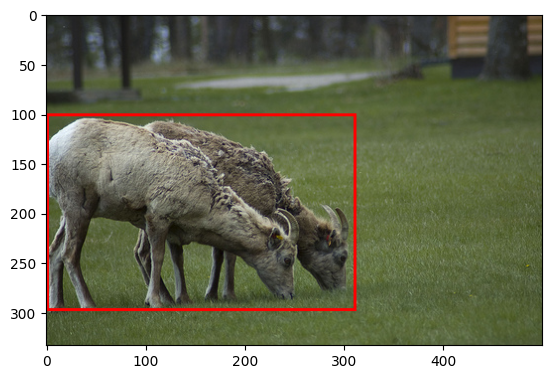

gt: the goats recently had their coats sheered.


id: 14a726c66b1a9e57a0d78c64f98c854e 	clue: buildings with peaked roofs and chimneys in the background


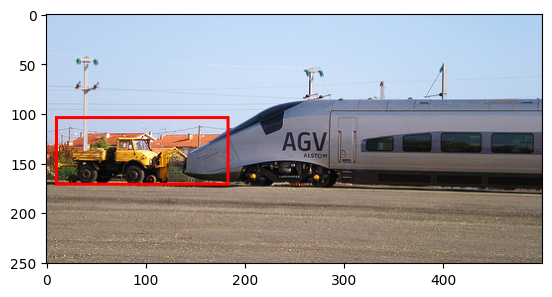

gt: the buildings are residential


id: 8c03ba0b1af4e208075edf859fca6fdd 	clue: bowls on table


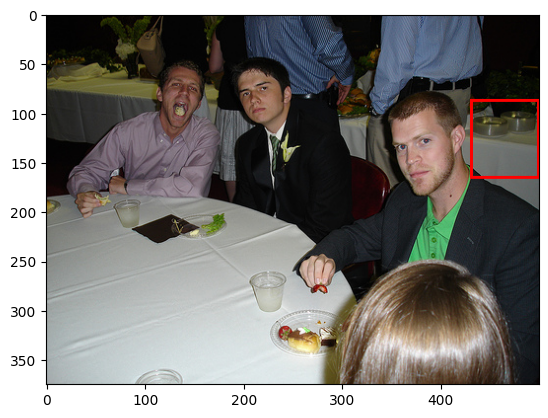

gt: There is a buffet style menu.


id: 010a101a3e657b2e8ef635672350c238 	clue: a woman wearing a tank top


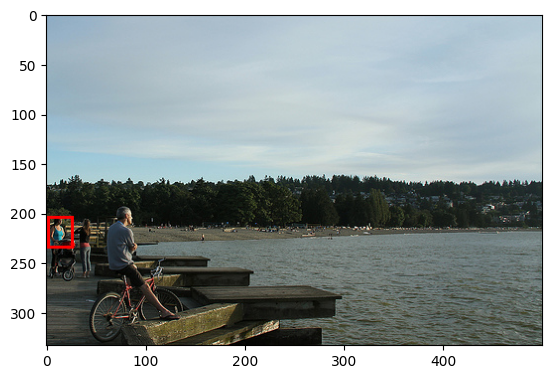

gt: the weather in this location is warm


id: de31954e4690a4c740f4407640ff64c1 	clue: people on skies with mountains in the back


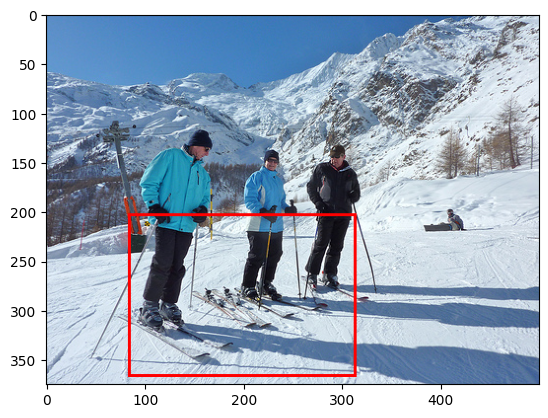

gt: this is a ski resort


In [131]:
instance_ids = [
"33bee6774dab3f824a0ee3feea7f1ad3",
"e528b53293c4a5ff9210723914c8056e",
"e8c3f17b4beefbe79ea8214f81dab568",
"96129922f95a13bb6b6a230a9cefe61d",
"fb27f556b0df01ebad4a60ce41a4f5d6",
"d85701d20fb432f482793fa8be7282de",
"14a726c66b1a9e57a0d78c64f98c854e",
"8c03ba0b1af4e208075edf859fca6fdd",
"010a101a3e657b2e8ef635672350c238",
"de31954e4690a4c740f4407640ff64c1",
]

for iid in instance_ids:
  row = df_tr[df_tr['instance_id'] == iid].iloc[0]
  img = get_example(row)
  print(f'\n\nid: {iid} \tclue: {row["inputs.clue"]}')
  plt.imshow(img)
  plt.show()
  print(f'gt: {row["targets.inference"]}')
